<a href="https://www.kaggle.com/code/ikomanggg28/classification-uk-smoker-analysis?scriptVersionId=184444332" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classification and Characteristics UK Smoking

Classification and characteristics of smoking in the UK can be explored using machine learning techniques. By leveraging historical data on smoking behaviors collected from various sources such as health surveys and demographic data, machine learning techniques can classify individuals into different categories based on their smoking habits. Machine learning models can learn patterns and trends in the data, including factors such as age, gender, socioeconomic status, and environmental factors that influence smoking behavior. Using classification algorithms such as Decision Trees, Random Forests, or Support Vector Machines, models can identify the most significant features in distinguishing between smokers and non-smokers, as well as predict the likelihood of someone becoming a smoker based on these characteristics. The insights gained from this analysis can provide valuable insights for public health policies and prevention programs aimed at reducing the prevalence of smoking and its impact on public health in the UK.

Survey data on smoking habits from the UK. The data set can be used for analyzing the demographic characteristics of smokers and types of tobacco consumed. A data frame with 1691 observations on the following 12 variables.

# Import Library and Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-smoking-data/smoking.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/uk-smoking-data/smoking.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1691 non-null   object 
 1   age                    1691 non-null   int64  
 2   marital_status         1691 non-null   object 
 3   highest_qualification  1691 non-null   object 
 4   nationality            1691 non-null   object 
 5   ethnicity              1691 non-null   object 
 6   gross_income           1691 non-null   object 
 7   region                 1691 non-null   object 
 8   smoke                  1691 non-null   object 
 9   amt_weekends           421 non-null    float64
 10  amt_weekdays           421 non-null    float64
 11  type                   421 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 158.7+ KB


# Overcome with Missing Value

In [4]:
print('The Missing Values Before Overcome:')
print(df.isna().sum())

The Missing Values Before Overcome:
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64


In [5]:
df['amt_weekdays'].fillna(0, inplace=True)
df['amt_weekends'].fillna(0, inplace=True)
df['type'].fillna('No Smoke', inplace=True)
df.head()

/tmp/ipykernel_18/1958907907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amt_weekdays'].fillna(0, inplace=True)
/tmp/ipykernel_18/1958907907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,0.0,0.0,No Smoke
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,0.0,0.0,No Smoke
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,0.0,0.0,No Smoke
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,0.0,0.0,No Smoke


In [6]:
print('The Missing Values After Overcome:')
print(df.isna().sum())

The Missing Values After Overcome:
gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64


In [7]:
df.describe(include='all')

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
count,1691,1691.000000,1691,1691,1691,1691,1691,1691,1691,1691.000000,1691.000000,1691
unique,2,NaN,5,8,8,7,10,7,2,NaN,NaN,5
top,Female,NaN,Married,No Qualification,English,White,"5,200 to 10,400",Midlands & East Anglia,No,NaN,NaN,No Smoke
freq,965,NaN,812,586,833,1560,396,443,1270,NaN,NaN,1270
mean,NaN,49.836192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.085748,3.423418,NaN
std,NaN,18.736851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.643517,7.568341,NaN
min,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,NaN,65.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


# Overcome with Duplicated Values

In [8]:
print('Variable with Duplicated Value:', df.duplicated().sum())

Variable with Duplicated Value: 21


In [9]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1670 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1670 non-null   object 
 1   age                    1670 non-null   int64  
 2   marital_status         1670 non-null   object 
 3   highest_qualification  1670 non-null   object 
 4   nationality            1670 non-null   object 
 5   ethnicity              1670 non-null   object 
 6   gross_income           1670 non-null   object 
 7   region                 1670 non-null   object 
 8   smoke                  1670 non-null   object 
 9   amt_weekends           1670 non-null   float64
 10  amt_weekdays           1670 non-null   float64
 11  type                   1670 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 169.6+ KB


# Check Data Outliers

In [10]:
numeric_columns = df.select_dtypes(['int', 'float']).columns
numeric_columns

Index(['age', 'amt_weekends', 'amt_weekdays'], dtype='object')

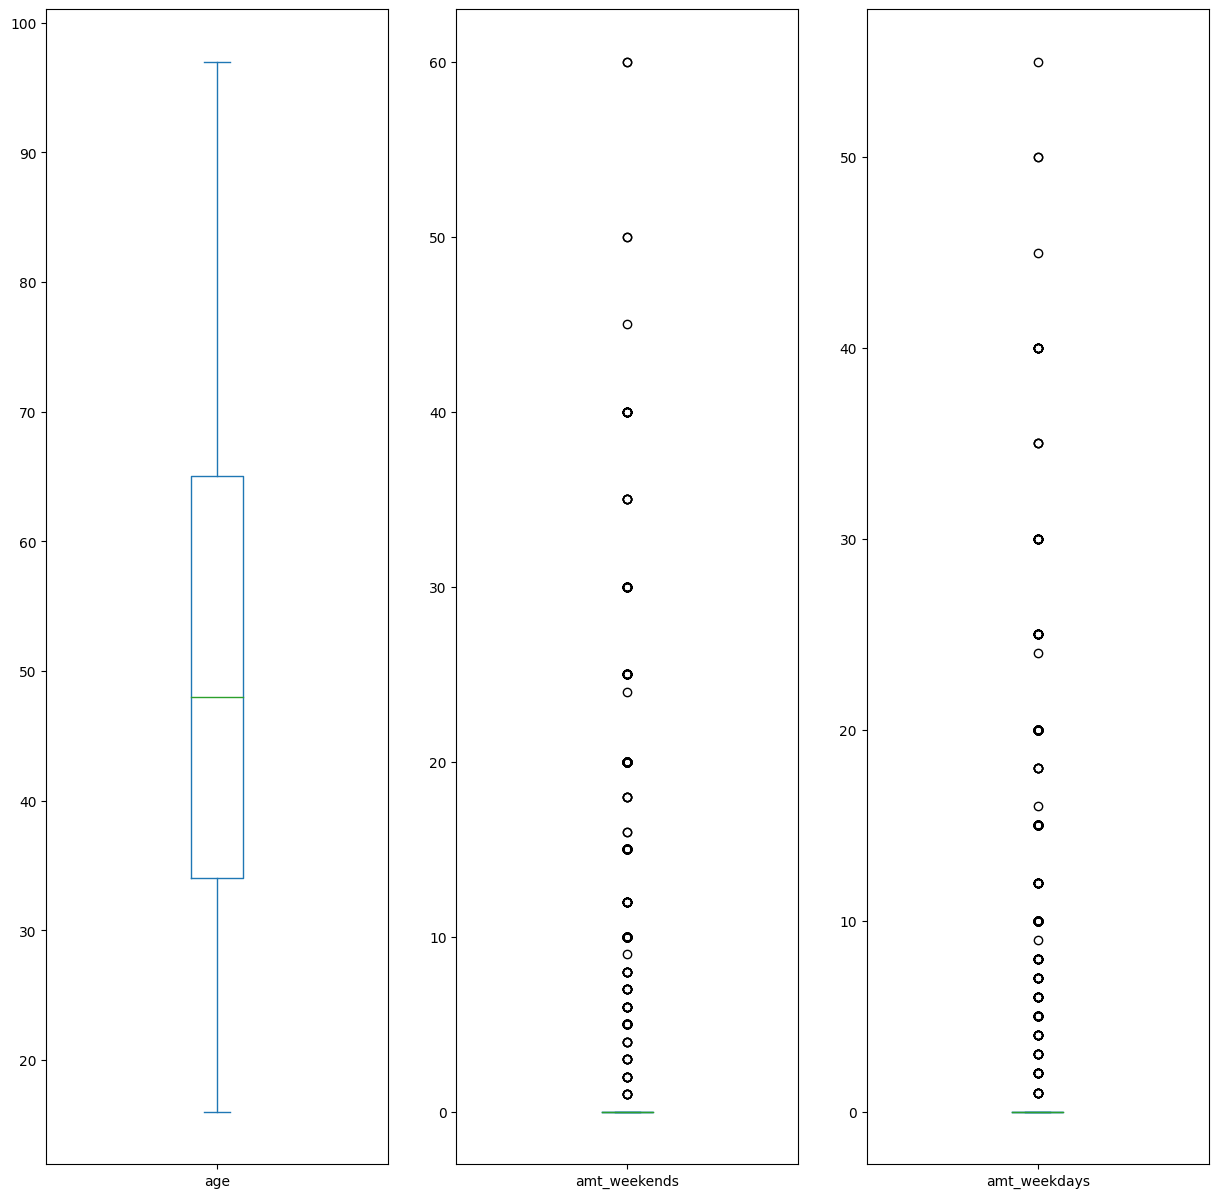

In [11]:
df[numeric_columns].plot(subplots=True, kind='box', layout=(1,3),figsize=(15,15))
plt.show()

It can be seen from the boxplot that the number of cigarettes spent on weekdays and weekends has outliers data.

# Check Distribution Data

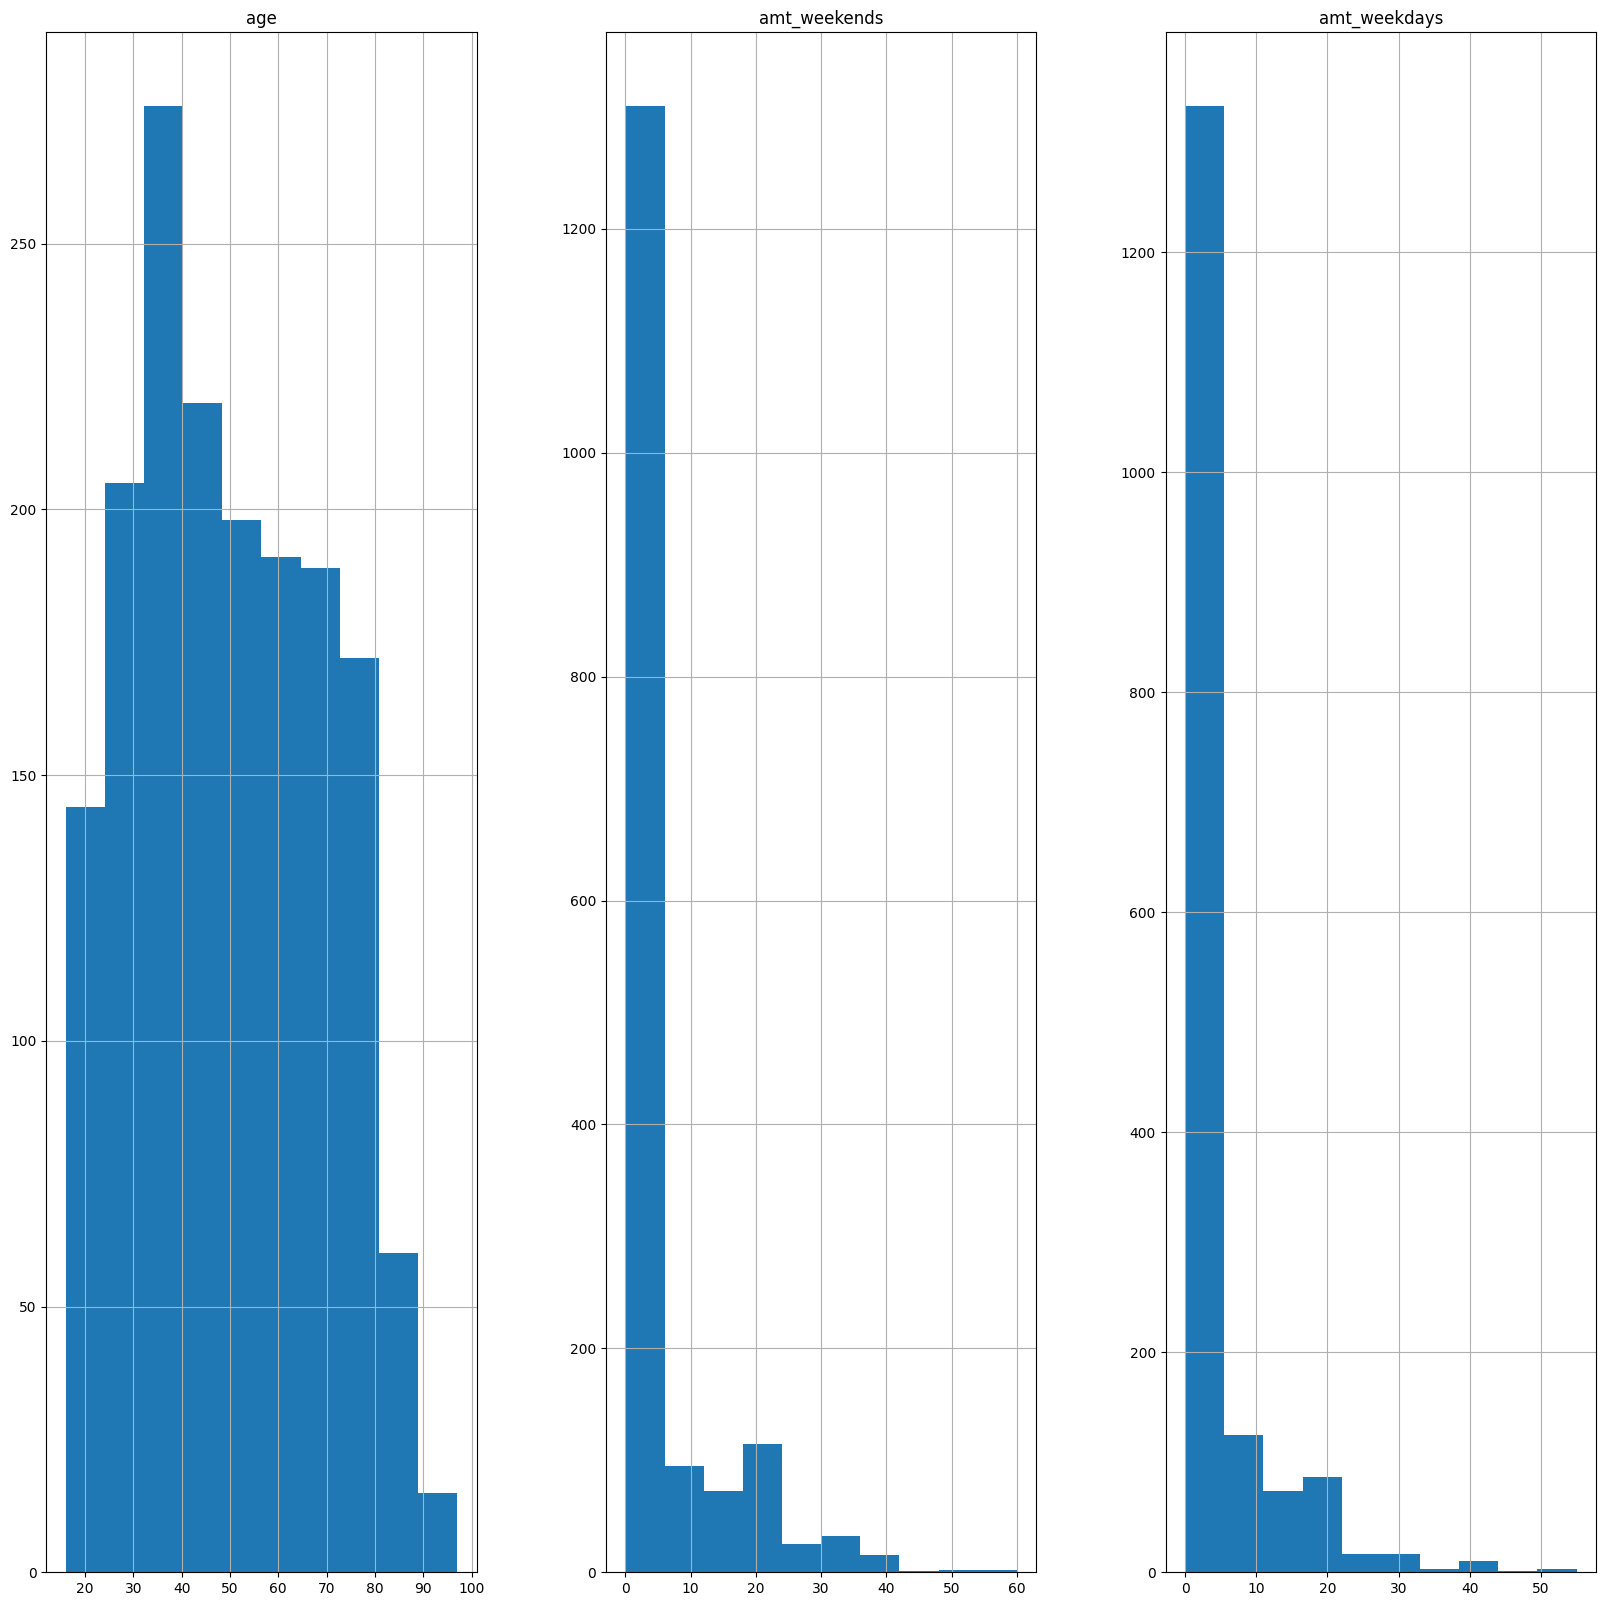

In [12]:
df.hist(figsize=(20,20), layout=(1,3), column = numeric_columns)
plt.show()

The distribution of data that does not appear to be normally distributed and also those that indicate outliers and use the robust scaller to overcome them.

# Data Insight and Vizualitation

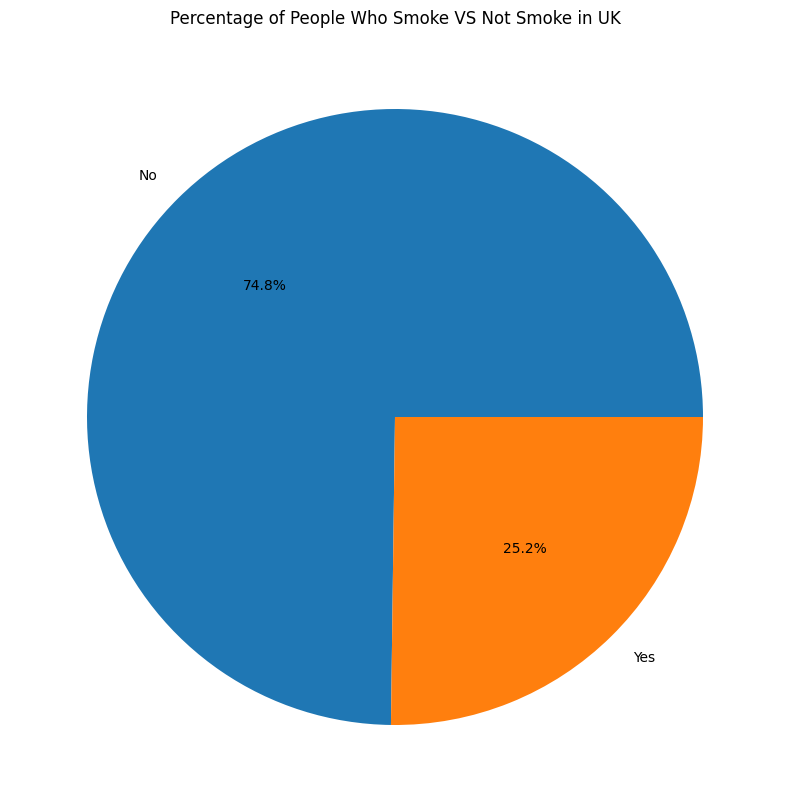

In [13]:
group_df = df.groupby('smoke').count().reset_index()
plt.figure(figsize=(10,10))
plt.pie(group_df['gender'], labels=('No', 'Yes'), autopct='%1.1f%%')
plt.title('Percentage of People Who Smoke VS Not Smoke in UK')
plt.show()

Based on the pie chart, it was found that around 3/4 of those surveyed thought that the number of people smoking in the UK was low.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

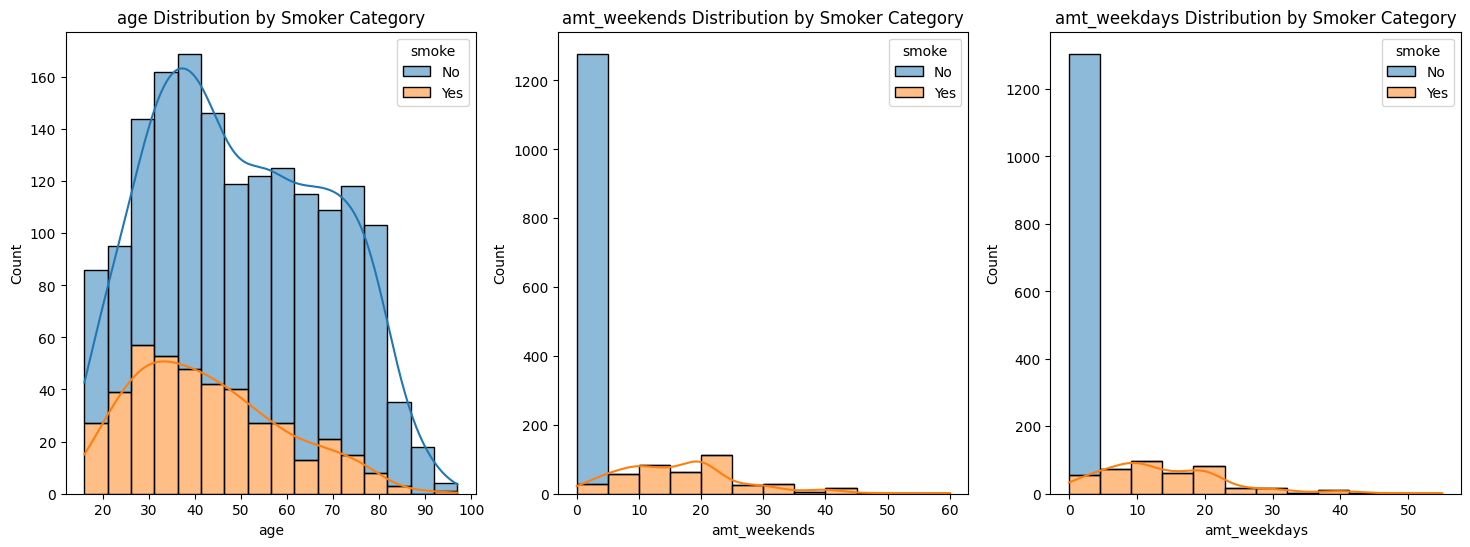

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(numeric_columns):
    sns.histplot(data=df, x=col, hue='smoke', multiple='stack', kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Smoker Category')
plt.show()

- The age distribution between smokers and nonsmokers appears to be similar and has the same distribution, with the number of smokers and nonsmokers in the 30-40 year age range.
- For the amt_weekends and amt_weekdays features, due to the small amount of smoking, the distribution at 0 is very high at that point.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1670 entries, 0 to 1690
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 1670 non-null   object 
 1   age                    1670 non-null   int64  
 2   marital_status         1670 non-null   object 
 3   highest_qualification  1670 non-null   object 
 4   nationality            1670 non-null   object 
 5   ethnicity              1670 non-null   object 
 6   gross_income           1670 non-null   object 
 7   region                 1670 non-null   object 
 8   smoke                  1670 non-null   object 
 9   amt_weekends           1670 non-null   float64
 10  amt_weekdays           1670 non-null   float64
 11  type                   1670 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 169.6+ KB


In [16]:
object_columns = df.select_dtypes(['object']).columns
object_columns = object_columns.drop(['smoke']).copy()
object_columns

Index(['gender', 'marital_status', 'highest_qualification', 'nationality',
       'ethnicity', 'gross_income', 'region', 'type'],
      dtype='object')

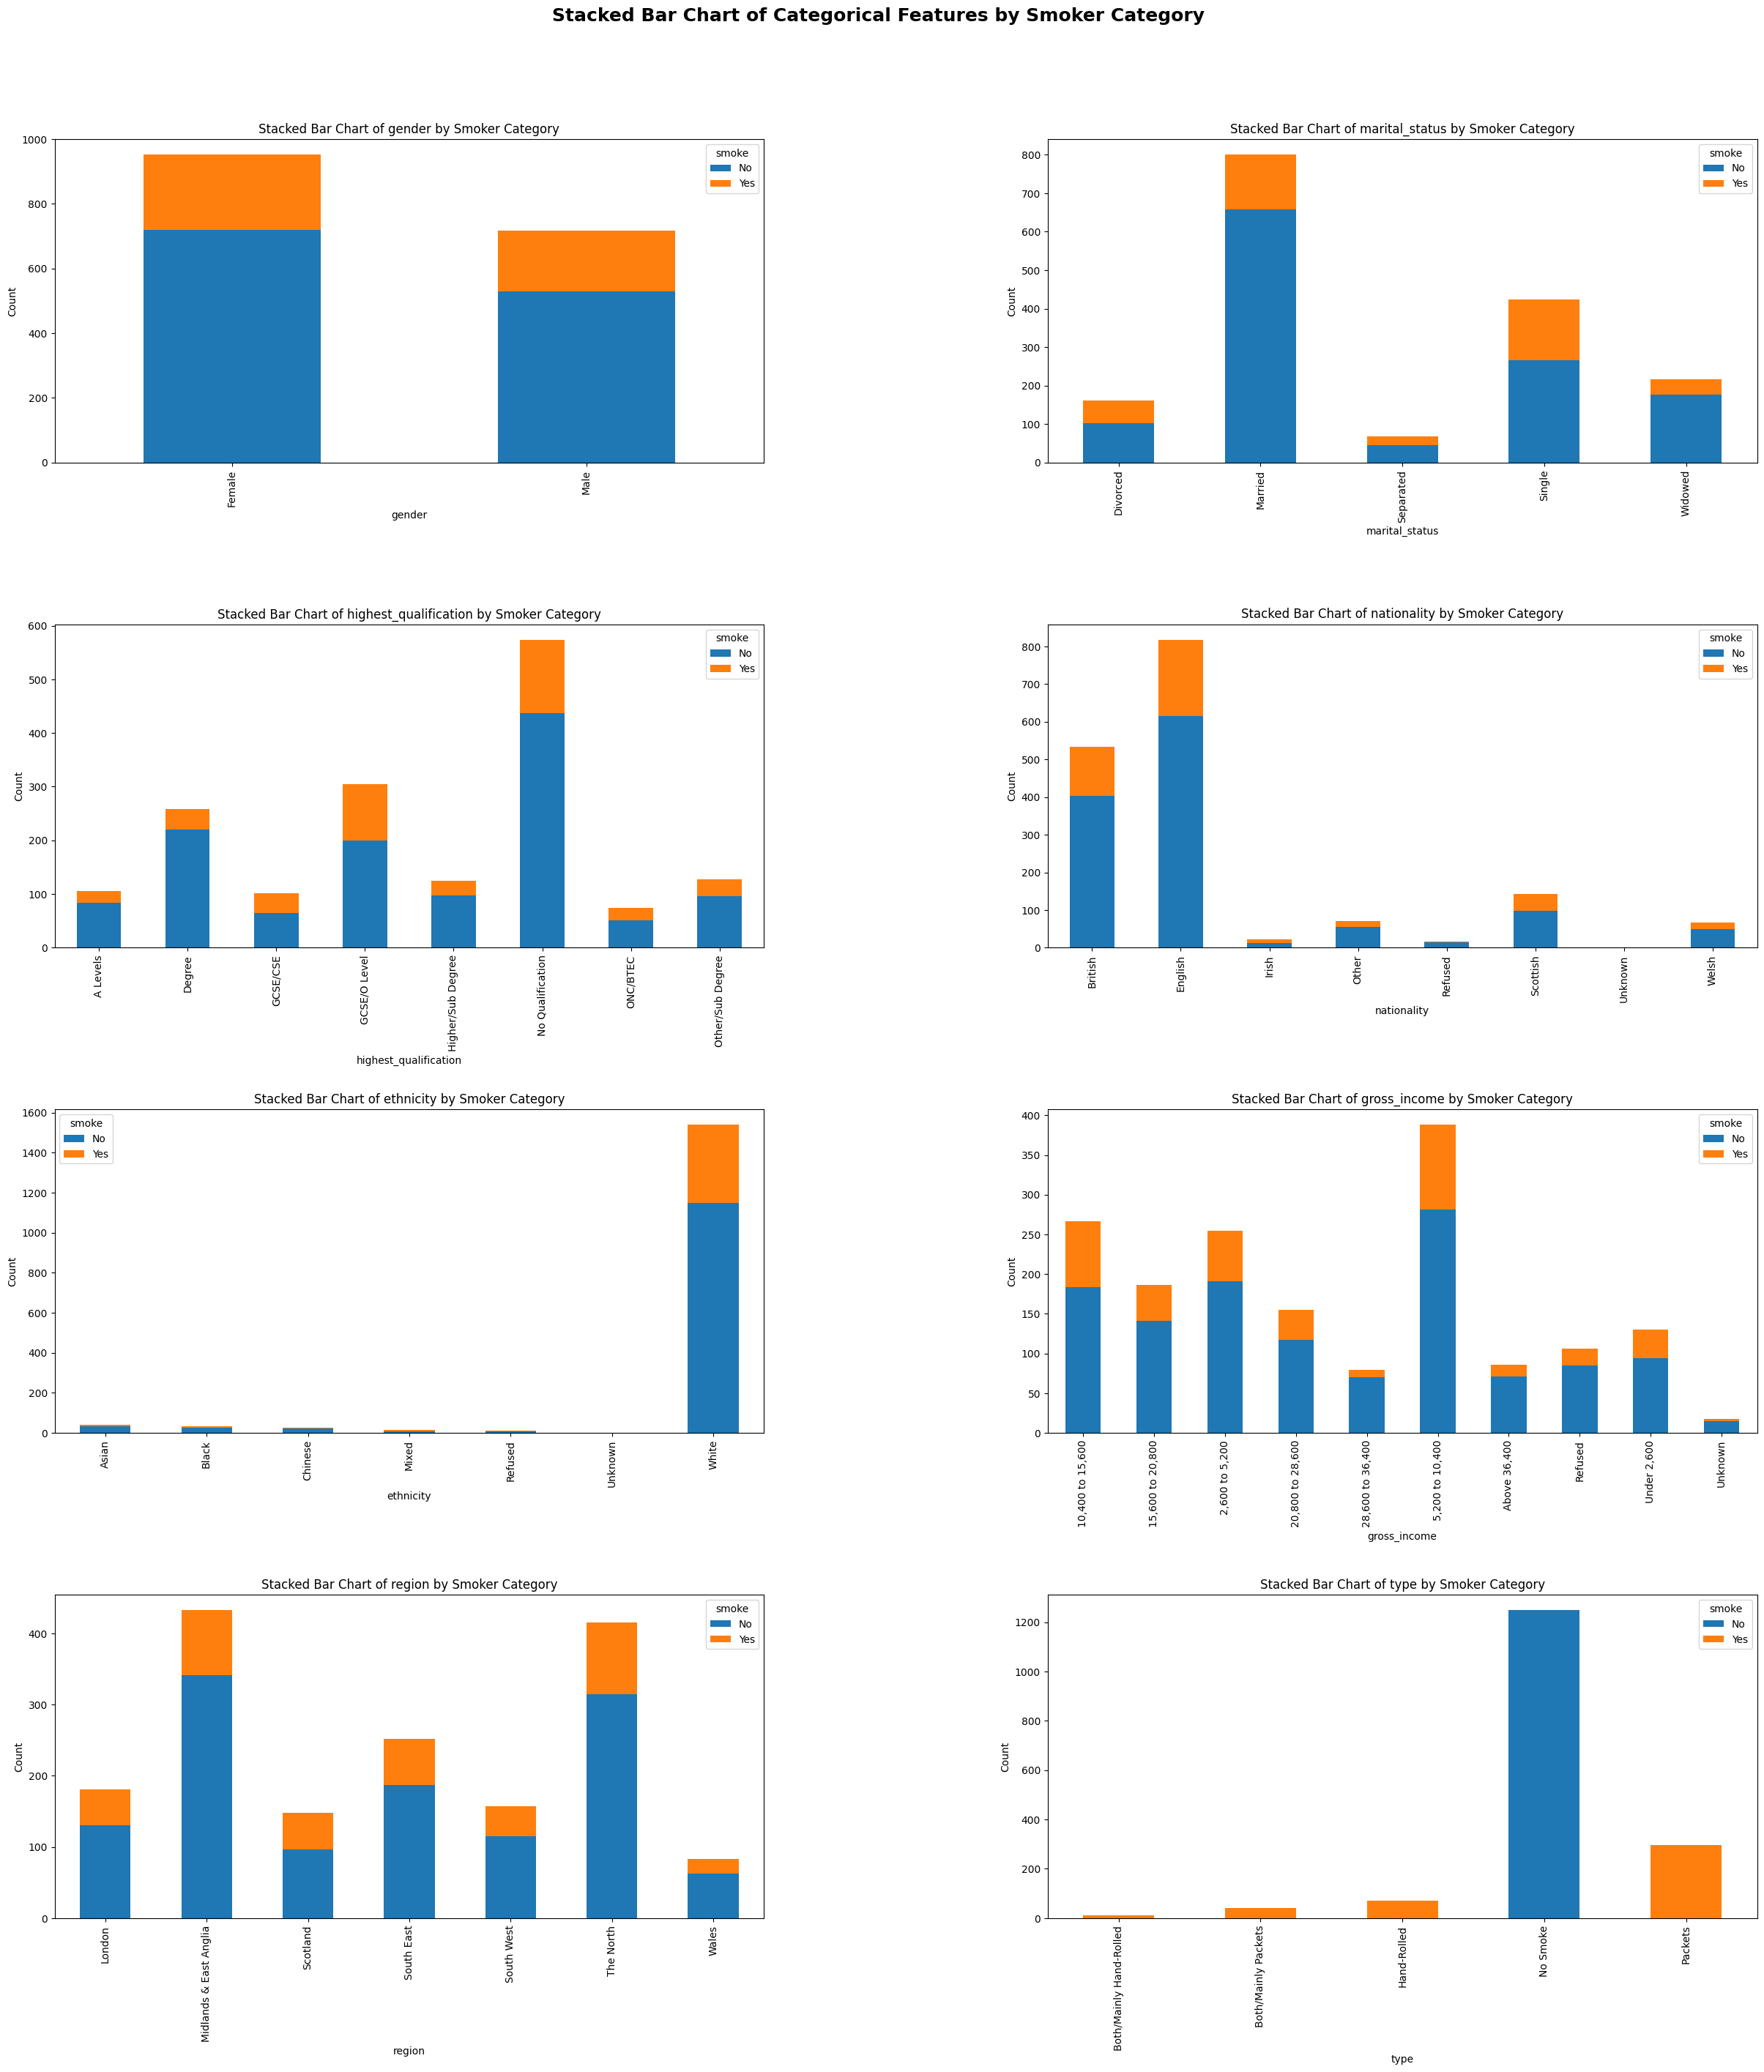

In [17]:
fig = plt.figure(figsize=(30, 30))
fig.suptitle('Stacked Bar Chart of Categorical Features by Smoker Category', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, column in enumerate(object_columns):
    ax = fig.add_subplot(4, 2, i + 1)
    crosstab = pd.crosstab(df[column], df['smoke'])
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Stacked Bar Chart of {column} by Smoker Category')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

- The number of non-smokers was mostly female and the proportion of males and females who smoked was similar.
- White ethnicity had the highest proportion of the smoking category, this could be because the survey was conducted in the UK.
- Usually people who smoke are mostly single and have no responsibilities compared to non-smokers who are married.
- People with No qualification had the highest proportion of smokers in both categories, and GSCE and no qualification were the categories with the highest number of smokers.
- As the survey was conducted in the UK, the highest nationality was British and English.
- The gross income of non-smokers and smokers was highest in the 5,200-10,400 range.
- For the highest region in Midlans & East Anglia and The North.
- Smokers usually smoke mostly packets.

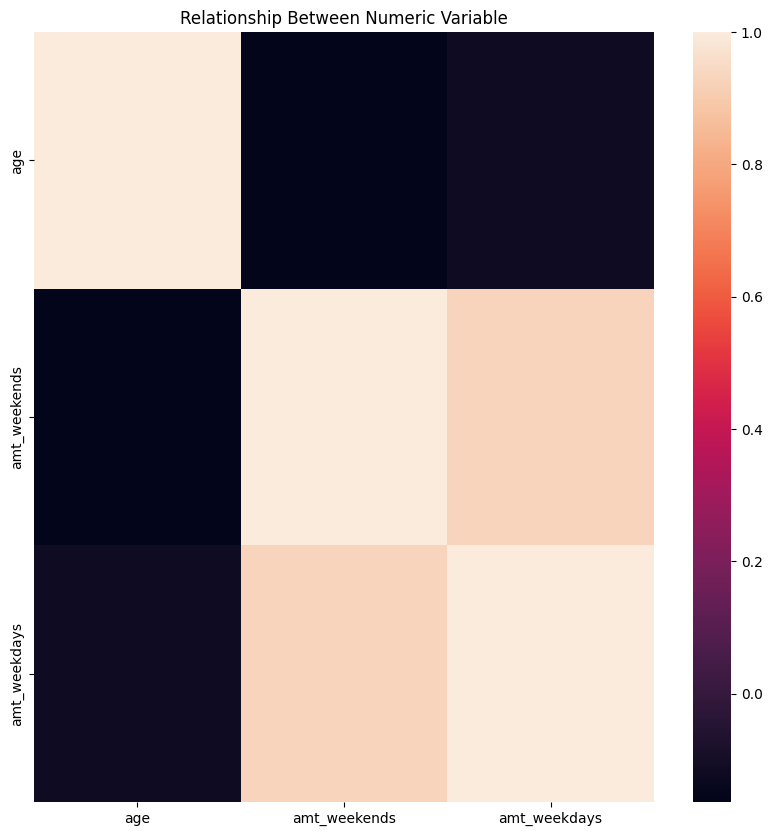

In [18]:
corr = df[numeric_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.title('Relationship Between Numeric Variable')
plt.show()

In [19]:
corr.style.background_gradient(cmap='coolwarm')

,age,amt_weekends,amt_weekdays
age,1.000000,-0.163781,-0.118786
amt_weekends,-0.163781,1.000000,0.928195
amt_weekdays,-0.118786,0.928195,1.000000


The relationship between amt_weekends and amt_weekdays has a stronger relationship than age.

# Machine Learning Model

In [20]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 6.0 MB/s eta 0:0

In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
import pycaret
from pycaret.classification import ClassificationExperiment

In [22]:
scaler = RobustScaler()
df1 = df[numeric_columns]
df2 = df.drop(numeric_columns, axis = 1)
robust_df = scaler.fit_transform(df1)
robust_df = pd.DataFrame(robust_df, columns=numeric_columns)
df2 = pd.DataFrame(df2)
robust_df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df_merges = pd.concat([robust_df, df2], axis=1)
df_merges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1670 non-null   float64
 1   amt_weekends           1670 non-null   float64
 2   amt_weekdays           1670 non-null   float64
 3   gender                 1670 non-null   object 
 4   marital_status         1670 non-null   object 
 5   highest_qualification  1670 non-null   object 
 6   nationality            1670 non-null   object 
 7   ethnicity              1670 non-null   object 
 8   gross_income           1670 non-null   object 
 9   region                 1670 non-null   object 
 10  smoke                  1670 non-null   object 
 11  type                   1670 non-null   object 
dtypes: float64(3), object(9)
memory usage: 156.7+ KB


In [23]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df_merges = df_merges.apply(lambda x: object_to_int(x))
df_merges.head()

,age,amt_weekends,amt_weekdays,gender,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,type
0,-0.322581,0.0,0.0,1,0,5,0,6,2,5,0,3
1,-0.193548,12.0,12.0,0,3,5,0,6,8,5,1,4
2,-0.258065,0.0,0.0,1,1,1,1,6,4,5,0,3
3,-0.258065,0.0,0.0,0,1,1,1,6,0,5,0,3
4,-0.290323,0.0,0.0,0,1,3,0,6,2,5,0,3


In [24]:
s = ClassificationExperiment()
s.setup(data=df_merges, target="smoke", session_id=1066)
s.compare_models(n_select = 5, sort='Accuracy', fold=5)

,Description,Value
0,Session id,1066
1,Target,smoke
2,Target type,Binary
3,Original data shape,"(1670, 12)"
4,Transformed data shape,"(1670, 12)"
5,Transformed train set shape,"(1169, 12)"
6,Transformed test set shape,"(501, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0240
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0240
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1660
rf,Random Forest Classifier,0.9991,1.0000,0.9966,1.0000,0.9983,0.9977,0.9977,0.2120
ada,Ada Boost Classifier,0.9991,1.0000,0.9966,1.0000,0.9983,0.9977,0.9977,0.1040
gbc,Gradient Boosting Classifier,0.9991,1.0000,0.9966,1.0000,0.9983,0.9977,0.9977,0.0980
catboost,CatBoost Classifier,0.9991,1.0000,0.9966,1.0000,0.9983,0.9977,0.9977,1.8920
xgboost,Extreme Gradient Boosting,0.9983,1.0000,0.9932,1.0000,0.9966,0.9954,0.9955,0.0640
lightgbm,Light Gradient Boosting Machine,0.9983,0.9969,0.9932,1.0000,0.9966,0.9954,0.9955,0.3080
svm,SVM - Linear Kernel,0.9966,0.9960,0.9932,0.9934,0.9932,0.9910,0.9910,0.0300


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

[GaussianNB(priors=None, var_smoothing=1e-09),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=1066, splitter='best'),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1066, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=Tr

Using the pycaret library, we found the right method to use, so in this analysis we will use random forest because it is in the top 5 with good results. 

In [25]:
y = df_merges['smoke']
X = df_merges.drop('smoke', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 45, stratify=y)

In [27]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=1066, verbose=0,
                        warm_start=False)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))

1.0


In [28]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       105

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



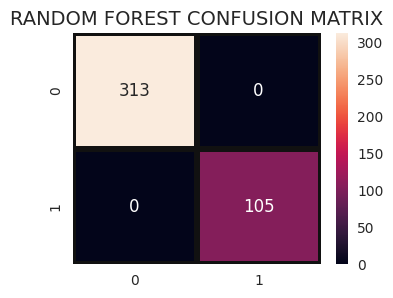

In [29]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

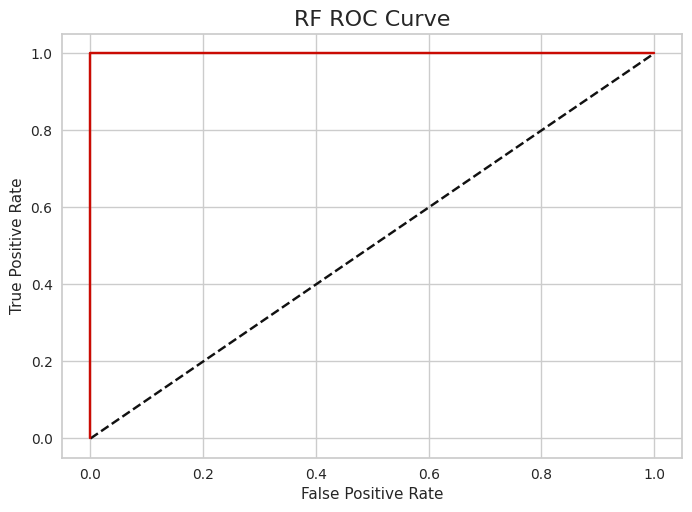

In [30]:
y_rfpred_prob = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve',fontsize=16)
plt.show();

The results of modeling using random forest found that the accuracy, ROC, and F1-score values were good with values in the range 0.9-1.

In [31]:
# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importance
print(feature_importance_df)

                  Feature  Importance
1            amt_weekends    0.434407
2            amt_weekdays    0.366066
10                   type    0.182761
0                     age    0.009756
4          marital_status    0.002287
5   highest_qualification    0.001397
8            gross_income    0.001309
9                  region    0.000856
6             nationality    0.000670
3                  gender    0.000320
7               ethnicity    0.000171


<Axes: >

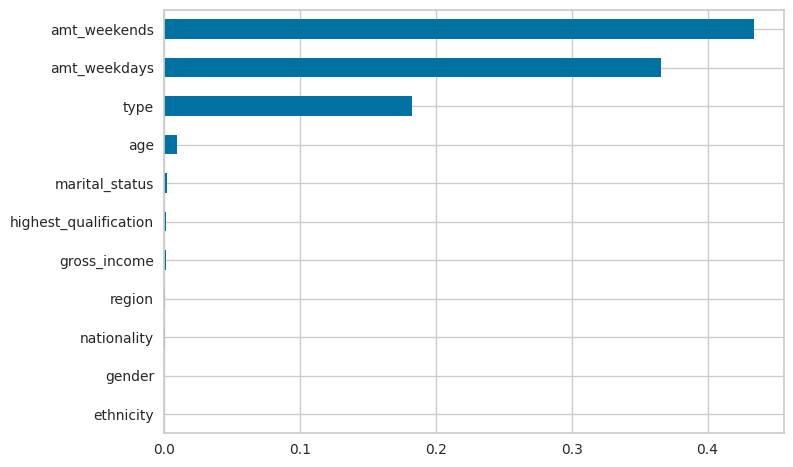

In [32]:
weights = pd.Series(feature_importance,
                 index=X.columns.values)
weights.sort_values()[-12:].plot(kind = 'barh')

The significant variables in random forest modeling are amt_weekends and amt_weekdays on category smoker.